In [1]:
"""
Lorenz attractor (Runge-Kutta method)
See: https://gist.github.com/komasaru/727865adc0bc42ae1e5e90388c2eee3a
"""
import sys
import traceback
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# a good list of these systems can be found in:
#   http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.740.3299&rep=rep1&type=pdf
#
# the lu paper also presents the derivatives of the 3 lorenz-like systems
# in a particularly nice way, which is borrowed here:
#   https://pdfs.semanticscholar.org/f86c/4b09a48e918b91794ac537d38903335496d1.pdf

def lorenz(state, a=10.0, b=8.0/3.0, c=28.0):
    """Lorenz system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=Deterministic+nonperiodic+flow.+lorenz&btnG=
         https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469(1963)020%3C0130%3Adnf%3E2.0.co%3B2
         
    @article{lorenz1963deterministic,
      title={Deterministic nonperiodic flow},
      author={Lorenz, Edward N},
      journal={Journal of the atmospheric sciences},
      volume={20},
      number={2},
      pages={130--141},
      year={1963}
    }
    """
    x, y, z = state
    return (
        a*y - a*x,
        c*x - x*z - y,
        x*y - b*z,
    )
lorenz_ic = 1.0, 1.0, 1.0

def chen(state, a=40.0, b=3.0, c=28.0):
    """Chen system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=Yet+another+chaotic+attractor&btnG=
    
    @article{chen1999yet,
      title={Yet another chaotic attractor},
      author={Chen, Guanrong and Ueta, Tetsushi},
      journal={International Journal of Bifurcation and chaos},
      volume={9},
      number={07},
      pages={1465--1466},
      year={1999},
      publisher={World Scientific}
    }
    """
    x, y, z = state
    return (
        a*y - a*x,
        (c-a)*x - x*z + c*y,
        x*y - b*z,
    )
chen_ic = -0.1, 0.5, -0.6

def lu(state, a=36.0, b=3.0, c=28.0):
    """Lu system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=+A+new+chaotic+attractor+coined&btnG=
         https://pdfs.semanticscholar.org/f86c/4b09a48e918b91794ac537d38903335496d1.pdf
         
    @article{lu2002new,
      title={A new chaotic attractor coined},
      author={L{\"u}, Jinhu and Chen, Guanrong},
      journal={International Journal of Bifurcation and chaos},
      volume={12},
      number={03},
      pages={659--661},
      year={2002},
      publisher={World Scientific}
    }
    """
    x, y, z = state
    return (
        a*y - a*x,
        -x*z + c*y,
        x*y - b*z,
    )
lu_ic = chen_ic #?


# the rossler system is different, in that it isn't a 2-scroll attractor
# some background discussion here:
#   http://scholarpedia.org/article/R%C3%B6ssler_attractor

def rossler(state, a=0.432, b=2.0, c=4.0):
    """Rossler system.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=O.+E.+R%C3%B6ssler%2C+An+equation+for+continuous+chaos&btnG=
    
    @article{rossler1976equation,
      title={An equation for continuous chaos},
      author={R{\"o}ssler, Otto E},
      journal={Physics Letters A},
      volume={57},
      number={5},
      pages={397--398},
      year={1976},
      publisher={Elsevier}
    }
    """
    x, y, z = state
    return (
        -y - z,
        x + a*y,
        b + z*x - z*c,
    )
rossler_ic = 1.0, 1.0, 1.0


# Chua's circuit is a another chaotic system that can give rise to 3-d attractors.

def g(v):
    """Electrical response of nonlinear resistor in Chua's circuit."""
    if v < -1:
        return -0.1*v + 3.9
    elif v < 1:
        return -4.0*v
    else:
        return -0.1*v - 3.9

def chua(state, inv_C1=10.0, inv_C2=0.5, inv_L=7.0, G=0.7):
    """Attractor derived from Chua's circuit.
    see: https://scholar.google.com/scholar?hl=en&as_sdt=0%2C48&q=Matsumoto%2C+Takashi++A+Chaotic+Attractor+from+Chua%27s+circuit&btnG=
         http://engineering.nyu.edu/mechatronics/Control_Lab/bck/VKapila/Chaotic%20Ref/Porfiri's/Biblio/Matsumoto84.pdf
    
    @article{matsumoto1984chaotic,
      title={A chaotic attractor from Chua's circuit},
      author={Matsumoto, Takashi},
      journal={IEEE Transactions on Circuits and Systems},
      volume={31},
      number={12},
      pages={1055--1058},
      year={1984},
      publisher={IEEE}
    }
    """
    vc1, vc2, il = state
    return (
        inv_C1 * (G*vc2 - G*vc1 - g(vc1)),
        inv_C2 * (G*vc1 - G*vc2 + il),
        inv_L * -vc2,
    )
chua_ic = 1.45305, -4.36956, 0.15034


# Wikipedia claims this modifier Chua attractor is from Tang? et al.
#   https://en.wikipedia.org/wiki/Multiscroll_attractor
#   http://www.ee.cityu.edu.hk/~gchen/pdf/LC-IJBC06-survey.pdf

# it has a lot of scrolls, but we probably won't use it

def tang_chua(state, alpha=10.82, beta=14.286, a=1.3, b=.11, c=7, d=0):
    """Multiscroll attractor based on modified Chua circuit."""
    x, y, z = state
    h = -b * math.sin((math.pi*x) / (2*a) + d)
    return (
        alpha*y - alpha*h,
        x - y + z,
        -beta*y,
    )
tang_chua_ic = 1, 1, 0


class RKplot3D(object):
    # DT            = 1e-3     # Differential interval
    # STEP          = 100000   # Time step count
    # X_0, Y_0, Z_0 = 1, 1, 1  # Initial values of x, y, z

    def __init__(self, dt=0.001, step=100000, initial_conditions=lorenz_ic, pp=False):
        self.res = [[], [], []]
        self.DT = dt
        self.STEP = step
        self.X_0, self.Y_0, self.Z_0 = initial_conditions
        self.pp = pp

    def exec(self, eqn=lorenz, ic=None):
        """ Loranz attractor (Runge-Kutta method) execution """
        try:
            if ic is not None:
                self.X_0, self.Y_0, self.Z_0 = ic
            
            xyz = [self.X_0, self.Y_0, self.Z_0]
            for _ in range(self.STEP):
                k_0 = eqn(xyz)
                k_1 = eqn([
                    x + k * self.DT / 2 for x, k in zip(xyz, k_0)
                ])
                k_2 = eqn([
                    x + k * self.DT / 2 for x, k in zip(xyz, k_1)
                ])
                k_3 = eqn([
                    x + k * self.DT for x, k in zip(xyz, k_2)
                ])
                for i in range(3):
                    xyz[i] += (k_0[i] + 2 * k_1[i] + 2 * k_2[i] + k_3[i]) \
                            * self.DT / 6.0
                    self.res[i].append(xyz[i])
                if self.pp:
                    print(xyz)
            self.__plot()
        except Exception as e:
            raise

    def __plot(self):
        """ Protting """
        try:
            fig = plt.figure(figsize=(12, 9), dpi=80)
            ax = Axes3D(fig)
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("z")
            ax.set_title("Some chaotic attractor")
            ax.plot(self.res[0], self.res[1], self.res[2], color="blue", lw=1)
            plt.show()
            #plt.savefig("lorenz_attractor_runge_kutta.png")
        except Exception as e:
            raise

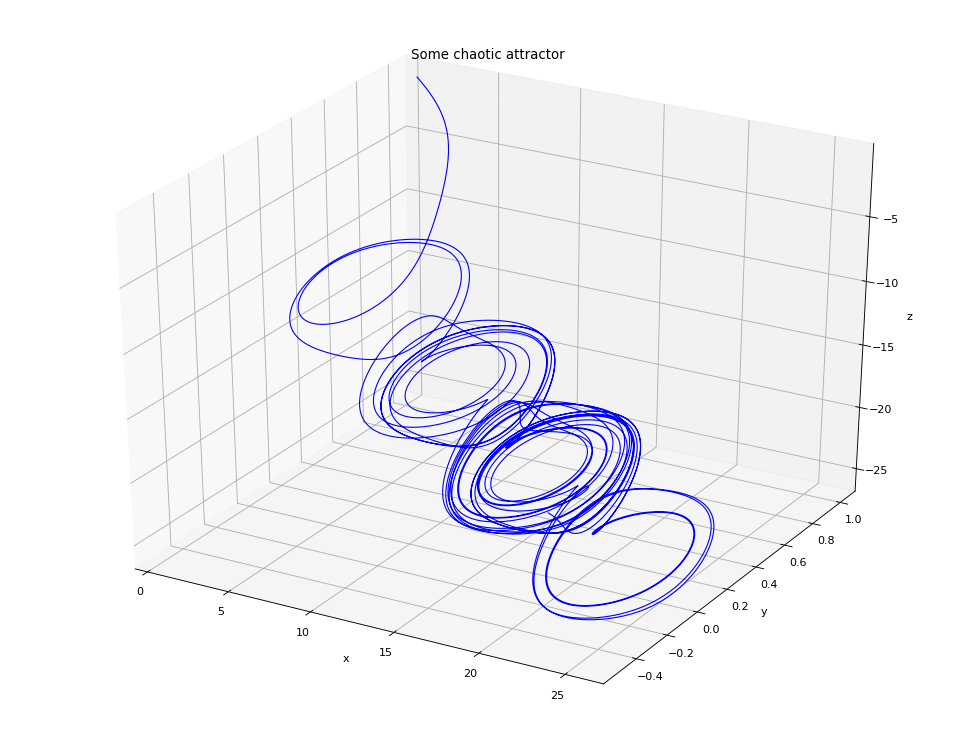

In [2]:
obj = RKplot3D(dt=.001, step=100000, pp=False)
obj.exec(eqn=tang_chua, ic=tang_chua_ic)